In [1]:
#required imports
from sklearn.neural_network import MLPRegressor
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error  
from math import sqrt 
from sklearn.metrics import confusion_matrix



In [2]:
#load features
features = pd.read_csv("../all_stations_events/14_events.csv")
features.head()

,Unnamed: 0,Station ID,Year,Month,Day of Month,Day of Year,Day of Week,Season,Holiday,Daily Weather,...,Windspeed,Windspeed (Past),Apparent Temperature (Avg),Apparent Temperature (Avg) (Past),Rented Bikes,Rented Bikes (Future),nearestEvent,nearestEvent (Future),nbCloseEvents,nbCloseEvents (Future)
0,0,14,2015,1,4,4,7,Winter,False,fog,...,0.55,NaN,36.295,NaN,33,281,9999.0,9999.0,0,0
1,1,14,2015,1,5,5,1,Winter,False,partly-cloudy-day,...,1.59,0.55,46.740,36.295,281,279,9999.0,9999.0,0,0
2,2,14,2015,1,6,6,2,Winter,False,partly-cloudy-day,...,2.07,1.59,42.150,46.740,279,274,9999.0,9999.0,0,0
3,3,14,2015,1,7,7,3,Winter,False,partly-cloudy-night,...,4.13,2.07,45.450,42.150,274,161,9999.0,9999.0,0,0
4,4,14,2015,1,8,8,4,Winter,False,rain,...,3.60,4.13,46.200,45.450,161,270,9999.0,9999.0,0,0


In [3]:
#transorm non-numerical labels to numerical labels
le = LabelEncoder()
features.loc[:,'Holiday'] = le.fit_transform(features['Holiday'])
features.head()

,Unnamed: 0,Station ID,Year,Month,Day of Month,Day of Year,Day of Week,Season,Holiday,Daily Weather,...,Windspeed,Windspeed (Past),Apparent Temperature (Avg),Apparent Temperature (Avg) (Past),Rented Bikes,Rented Bikes (Future),nearestEvent,nearestEvent (Future),nbCloseEvents,nbCloseEvents (Future)
0,0,14,2015,1,4,4,7,Winter,0,fog,...,0.55,NaN,36.295,NaN,33,281,9999.0,9999.0,0,0
1,1,14,2015,1,5,5,1,Winter,0,partly-cloudy-day,...,1.59,0.55,46.740,36.295,281,279,9999.0,9999.0,0,0
2,2,14,2015,1,6,6,2,Winter,0,partly-cloudy-day,...,2.07,1.59,42.150,46.740,279,274,9999.0,9999.0,0,0
3,3,14,2015,1,7,7,3,Winter,0,partly-cloudy-night,...,4.13,2.07,45.450,42.150,274,161,9999.0,9999.0,0,0
4,4,14,2015,1,8,8,4,Winter,0,rain,...,3.60,4.13,46.200,45.450,161,270,9999.0,9999.0,0,0


In [4]:
cleanup_nums = {
            "Season": {"Spring": 1, "Summer": 2, "Autumn": 3, "Winter": 4},
               "Daily Weather": {"clear-day": 1, "partly-cloudy-day": 2, "partly-cloudy-night": 2,"cloudy":3,"wind":4, "rain": 5, "fog": 6, "snow": 7},
               "Daily Weather (Past)": {"clear-day": 1, "partly-cloudy-day": 2, "partly-cloudy-night": 2, "cloudy":3,"wind":4, "rain": 5,"fog": 6, "snow": 7} }

In [5]:
features.replace(cleanup_nums, inplace=True)


In [6]:
features.head()

,Unnamed: 0,Station ID,Year,Month,Day of Month,Day of Year,Day of Week,Season,Holiday,Daily Weather,...,Windspeed,Windspeed (Past),Apparent Temperature (Avg),Apparent Temperature (Avg) (Past),Rented Bikes,Rented Bikes (Future),nearestEvent,nearestEvent (Future),nbCloseEvents,nbCloseEvents (Future)
0,0,14,2015,1,4,4,7,4,0,6,...,0.55,NaN,36.295,NaN,33,281,9999.0,9999.0,0,0
1,1,14,2015,1,5,5,1,4,0,2,...,1.59,0.55,46.740,36.295,281,279,9999.0,9999.0,0,0
2,2,14,2015,1,6,6,2,4,0,2,...,2.07,1.59,42.150,46.740,279,274,9999.0,9999.0,0,0
3,3,14,2015,1,7,7,3,4,0,2,...,4.13,2.07,45.450,42.150,274,161,9999.0,9999.0,0,0
4,4,14,2015,1,8,8,4,4,0,5,...,3.60,4.13,46.200,45.450,161,270,9999.0,9999.0,0,0


In [7]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514 entries, 0 to 1513
Data columns (total 23 columns):
Unnamed: 0                           1514 non-null int64
Station ID                           1514 non-null int64
Year                                 1514 non-null int64
Month                                1514 non-null int64
Day of Month                         1514 non-null int64
Day of Year                          1514 non-null int64
Day of Week                          1514 non-null int64
Season                               1514 non-null int64
Holiday                              1514 non-null int64
Daily Weather                        1514 non-null int64
Daily Weather (Past)                 1513 non-null float64
Humidity                             1514 non-null float64
Humidity (Past)                      1513 non-null float64
Windspeed                            1514 non-null float64
Windspeed (Past)                     1513 non-null float64
Apparent Temperature (Avg)  

In [8]:
features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1514.0,756.500000,437.198468,0.00000,378.25000,756.50000,1134.750000,1513.00
Station ID,1514.0,14.000000,0.000000,14.00000,14.00000,14.00000,14.000000,14.00
Year,1514.0,2016.622853,1.221543,2015.00000,2016.00000,2017.00000,2018.000000,2019.00
Month,1514.0,6.280713,3.513706,1.00000,3.00000,6.00000,9.000000,12.00
Day of Month,1514.0,15.731836,8.746603,1.00000,8.00000,16.00000,23.000000,31.00
Day of Year,1514.0,175.776750,107.500597,1.00000,78.00000,173.00000,269.000000,366.00
Day of Week,1514.0,4.000000,2.002312,1.00000,2.00000,4.00000,6.000000,7.00
Season,1514.0,2.532365,1.140759,1.00000,1.25000,3.00000,4.000000,4.00
Holiday,1514.0,0.021136,0.143885,0.00000,0.00000,0.00000,0.000000,1.00
Daily Weather,1514.0,2.622853,1.370458,1.00000,2.00000,2.00000,2.000000,7.00


In [9]:
#target variable
y = features['Rented Bikes'].tolist()


In [10]:
features.shape

(1514, 23)

In [11]:
#Feature Matrix with past and today data
X=features.loc[:,['Month','Season','Day of Week','Daily Weather','Humidity','Windspeed', 'Apparent Temperature (Avg)','Rented Bikes (Future)','nbCloseEvents','nearestEvent']]
X.head()

,Month,Season,Day of Week,Daily Weather,Humidity,Windspeed,Apparent Temperature (Avg),Rented Bikes (Future),nbCloseEvents,nearestEvent
0,1,4,7,6,0.94,0.55,36.295,281,0,9999.0
1,1,4,1,2,0.88,1.59,46.740,279,0,9999.0
2,1,4,2,2,0.86,2.07,42.150,274,0,9999.0
3,1,4,3,2,0.86,4.13,45.450,161,0,9999.0
4,1,4,4,5,0.87,3.60,46.200,270,0,9999.0


In [12]:
#Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


/opt/anaconda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [13]:
#initialize MLPRegressor
mlp = MLPRegressor(
    hidden_layer_sizes=(10,5),  activation='relu', solver='lbfgs', alpha=0.001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
    random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

m = mlp.fit(X_train_scaled,y_train)

predictions = m.predict(X_test_scaled)

In [14]:
#Print scores
print("Training set score: %f" % m.score(X_train_scaled, y_train))
print("Test set score: %f" % m.score(X_test_scaled, y_test))

Training set score: 0.887330
Test set score: 0.800919


In [15]:
#Compare predicted and actual values
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})  
df.head()

,Actual,Predicted
0,234,222.650850
1,236,298.620713
2,121,97.650323
3,391,357.528471
4,362,334.299296


## Accuracy
Recommended from [Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor)<br>
```python
score(X, y, sample_weight=None)
```
Returns the coefficient of determination R^2 of the prediction.

The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.


In [16]:
#Returns the coefficient of determination R^2 of the prediction
"The accuracy of the model is {0:.7f}".format(mlp.score(X_train_scaled,y_train))

'The accuracy of the model is 0.8873301'

## RMSE = Root Mean Square Error 
is a frequently used measure of the differences between values predicted by a model. 

It is the standard deviation of prediction errors.<br>
[RMSE](https://www.statisticshowto.datasciencecentral.com/rmse/) answers the question of how concentrated the data is around the line of best fit.
![](img/rmse.png)
Where:<br>
f = forecasts (expected values or unknown results)<br>
o = observed values (known results)

In [17]:
#RMSE version 1
a=df.loc[:,'Actual']
b=df.loc[:,'Predicted']
rmse=sqrt(mean_squared_error(a, b))  
"The root mean square error of the model is {0:.3f}".format(rmse) 

'The root mean square error of the model is 59.327'

In [18]:
#RMSE version 2
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

rmse = rmse(a,b)
"The root mean square error of the model is {0:.3f}".format(rmse)

'The root mean square error of the model is 59.327'

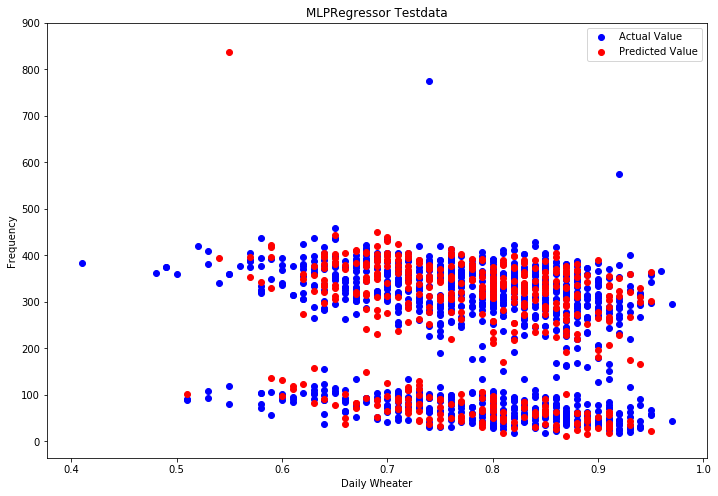

In [19]:
fig = plt.figure(figsize=(26,8))
plt.subplot(121)
plt.scatter(X_train.values[:,4], y_train, color = 'blue',label='Actual Value') 
plt.scatter(X_test.values[:,4], y_test, color = 'red',label='Predicted Value') 
plt.legend()
plt.yticks(np.arange(0, 1000, step=100))
plt.title("MLPRegressor Testdata")
plt.ylabel("Frequency")
plt.xlabel("Daily Wheater")
plt.show() 
fig.savefig('img/mlpDaily.png')

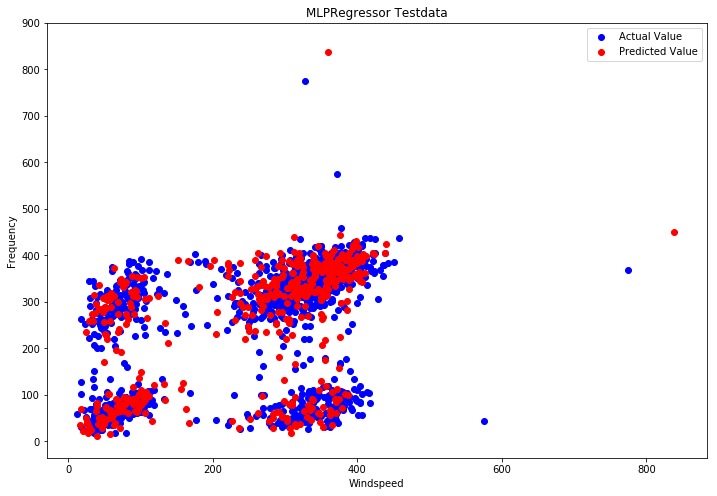

In [20]:
fig = plt.figure(figsize=(26,8))
plt.subplot(121)
plt.scatter(X_train.values[:,7], y_train, color = 'blue',label='Actual Value') 
plt.scatter(X_test.values[:,7], y_test, color = 'red',label='Predicted Value') 
plt.legend()
plt.yticks(np.arange(0, 1000, step=100))
plt.title("MLPRegressor Testdata")
plt.ylabel("Frequency")
plt.xlabel("Windspeed")
plt.show() 
fig.savefig('img/mlpWindspeed.png')

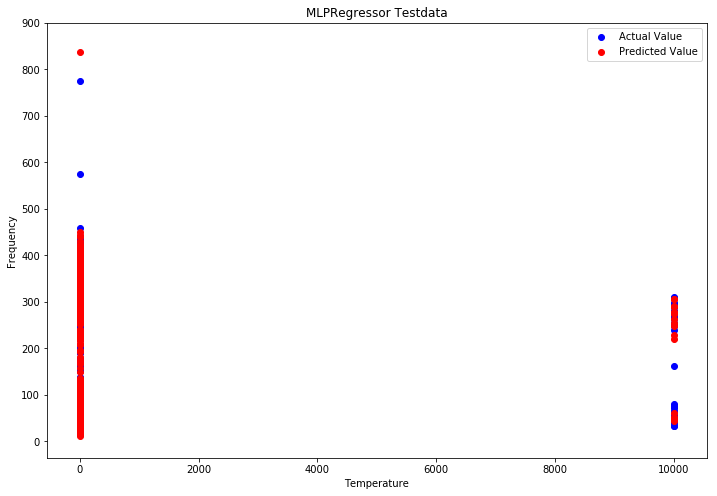

In [21]:
fig = plt.figure(figsize=(26,8))
plt.subplot(121)
plt.scatter(X_train.values[:,9], y_train, color = 'blue',label='Actual Value') 
plt.scatter(X_test.values[:,9], y_test, color = 'red',label='Predicted Value') 
plt.legend()
plt.yticks(np.arange(0, 1000, step=100))
plt.title("MLPRegressor Testdata")
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.show() 
fig.savefig('img/mlpTemp.png')